### 1. Pandas
- 테이블 형태(데이터프레임)의 데이터를 다룰 수 있는 라이브러리
- 데이터 로드, 정제, 분석, 변형 등을 편리하게 수행
- CSV, Excel, SQL 데이터베이스 연동 지원
- 데이터 필터링, 정렬, 집계, 변형 기능

In [70]:
# 데이터 불러오기 및 확인
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
# print(df.head())    # 상위 5개 행 출력
# print(df.info())  # 데이터 요약 정보      # nan, none
# print(df.describe())  # 기본 통계 요약
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [65]:
# 중복 확인 및 제거
df.duplicated().sum()

# unique한 1개의 key값만 남기고 나머지 중복은 제거
df.drop_duplicates()          # keep = 'first' 가 default
df.isnull().sum() 

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [71]:
# 결측값 확인 및 처리       # none, nan
print(df.isnull().sum())  # 결측값 개수 확인
df = df.dropna()  # 결측값 제거

# 결측값 대체
df.fillna(0)
# # df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [72]:
# 새로운 컬럼 추가
df["total_per_person"] = df["total_bill"] / df["size"]          # feature engineering
print(df.head())

   total_bill   tip     sex smoker  day    time  size  total_per_person
0       16.99  1.01  Female     No  Sun  Dinner     2          8.495000
1       10.34  1.66    Male     No  Sun  Dinner     3          3.446667
2       21.01  3.50    Male     No  Sun  Dinner     3          7.003333
3       23.68  3.31    Male     No  Sun  Dinner     2         11.840000
4       24.59  3.61  Female     No  Sun  Dinner     4          6.147500


In [76]:
# 특정 열의 value count
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [78]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'total_per_person'],
      dtype='object')

In [77]:
# 특정 열 제거
df.loc[:,~df.columns.isin(['smoker'])]

,total_bill,tip,sex,day,time,size,total_per_person
0,16.99,1.01,Female,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,Sun,Dinner,2,11.840000
4,24.59,3.61,Female,Sun,Dinner,4,6.147500
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,Dinner,3,9.676667
240,27.18,2.00,Female,Sat,Dinner,2,13.590000
241,22.67,2.00,Male,Sat,Dinner,2,11.335000
242,17.82,1.75,Male,Sat,Dinner,2,8.910000


In [ ]:
# 데이터 필터링 및 정렬

# 특정 조건 필터링 (예: total_bill이 20 이상인 데이터)
# filtered_df = df[df["total_bill"] >= 20]
# print(filtered_df.head())

# 데이터 정렬 (팁 금액 기준 내림차순)
sorted_df = df.sort_values(by="tip", ascending=False)
print(sorted_df.head())

     total_bill   tip     sex smoker  day    time  size  total_per_person
92         5.75  1.00  Female    Yes  Fri  Dinner     2             2.875
111        7.25  1.00  Female     No  Sat  Dinner     1             7.250
67         3.07  1.00  Female    Yes  Sat  Dinner     1             3.070
236       12.60  1.00    Male    Yes  Sat  Dinner     2             6.300
0         16.99  1.01  Female     No  Sun  Dinner     2             8.495


In [83]:
# 데이터 그룹화

# 성별에 따른 평균 팁 금액 계산
grouped_data = df.groupby("sex")["tip"].mean()
print(grouped_data)

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


- loc, iloc  -> location/ index location
>- iloc : 인덱스 번호로 행,열 가져오기
>- loc : label로 인덱싱

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [100]:
# loc, iloc

# df.iloc[0,0]
df.loc[2,'total_bill']

np.float64(21.01)

In [88]:
df.index = df['size']
df.loc[4]

,total_bill,tip,sex,smoker,day,time,size,total_per_person
size,,,,,,,,
4,24.59,3.61,Female,No,Sun,Dinner,4,6.1475
4,25.29,4.71,Male,No,Sun,Dinner,4,6.3225
4,26.88,3.12,Male,No,Sun,Dinner,4,6.7200
4,35.26,5.00,Female,No,Sun,Dinner,4,8.8150
4,18.43,3.00,Male,No,Sun,Dinner,4,4.6075
4,39.42,7.58,Male,No,Sat,Dinner,4,9.8550
4,17.81,2.34,Male,No,Sat,Dinner,4,4.4525
4,18.35,2.50,Male,No,Sat,Dinner,4,4.5875
4,20.69,2.45,Female,No,Sat,Dinner,4,5.1725


#### 실습

In [151]:
# 비디오 게임 판매량 데이터
df_sales = pd.read_csv('vgsales.csv')
df_sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Rank column 제거
df_sales = df_sales.loc[:,~df_sales.columns.isin(['Rank'])]         # (inplace = True)
df_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [107]:
# 결측값 확인
df_sales.isnull().sum()
# 결측값 제거
df_sales.dropna(inplace = True)
df_sales.isnull().sum()

/tmp/ipykernel_26813/3066310490.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.dropna(inplace = True)


Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [111]:
# 중복 데이터 개수 확인
df_sales.duplicated().sum()

# 중복 데이터 제거
df_sales.drop_duplicates(inplace = True)

/tmp/ipykernel_26813/2131644112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales.drop_duplicates(inplace = True)


In [115]:
# 특정 연도 이후 출시된 게임 필터링 (2010년 이후)
df_sales = df_sales[df_sales['Year'] >= 2010]
df_sales['Year'].value_counts()

# Global_Sales 기준으로 내림차순 정렬
df_sales.sort_values(by = 'Global_Sales', ascending = False, inplace = True)
df_sales

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
26,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
...,...,...,...,...,...,...,...,...,...,...
16535,Mushi Bugyou,3DS,2013.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16534,Time Travelers,PSP,2012.0,Adventure,Level 5,0.00,0.00,0.01,0.00,0.01
16533,Metal Gear Solid HD Edition,X360,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01
16532,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.00,0.00,0.01


In [117]:
# 장르별 평균 글로벌 판매량 계산(groupby)
df_sales.groupby("Genre")['Global_Sales'].mean()

# 플랫폼별 총 판매량 계산
df_sales.groupby("Platform")['Global_Sales'].sum()

Platform
3DS     246.27
DS      129.64
PC      119.78
PS2       6.10
PS3     602.44
PS4     278.10
PSP      64.27
PSV      61.60
Wii     232.33
WiiU     81.86
X360    556.95
XOne    141.06
Name: Global_Sales, dtype: float64

In [123]:
df_sales

[15       False
 16       False
 23       False
 26        True
 29       False
          ...  
 16535    False
 16534    False
 16533    False
 16532    False
 16531    False
 Name: Publisher, Length: 5134, dtype: bool]

In [ ]:
# Nintendo에서 출시한 게임만 필터링
df_sales = df_sales[df_sales['Publisher'] == 'Nintendo']
df_sales['Publisher'].value_counts()

Publisher
Nintendo    703
Name: count, dtype: int64

### 2. Numpy
- 다차원 배열 및 행렬 연산을 효율적으로 수행
- 기존의 리스트보다 빠르고 메모리 효율적임

In [128]:
import numpy as np          # tensor()

# 배열 생성
arr = np.array([1, 2, 3, 4, 5])
print("배열:", arr)

# 배열 연산
print("배열 + 10:", arr + 10)
print("배열 * 2:", arr * 2)

배열: [1 2 3 4 5]
배열 + 10: [11 12 13 14 15]
배열 * 2: [ 2  4  6  8 10]


In [129]:
# 배열 조건 인덱스 반환
np.where(arr>2)

(array([2, 3, 4]),)

In [141]:
#  배열 합치기 및 shape변환
a = np.array([[1, 2], [3, 4]])      # 2x2
b = np.array([[5, 6]])              # 1x2


b = b.reshape(2,1)                  # 2x1
c = np.concatenate((a,b), axis=1)       # 3x2
c

# array([[1, 2, 5],
#        [3, 4, 6]]) 형태로 출력해보기

array([[1, 2, 5],
       [3, 4, 6]])

In [143]:
b = b.reshape(2,1)
b

array([[5],
       [6]])

In [144]:
# 1차원 형태로 배열 변환

a.flatten()

array([1, 2, 3, 4])

In [145]:
# 2차원 배열(행렬) 생성
A = np.array([[1, 2], [3, 4]])      # 2x2
B = np.array([[5, 6], [7, 8]])      # 2x2

# 행렬 곱 계산
print("행렬 곱:", np.dot(A, B))     # 2x2

행렬 곱: [[19 22]
 [43 50]]


### 3. 시각화(matplotlib, seaborn)
- Matplotlib: 기본적인 그래프 및 커스텀 시각화 가능
- Seaborn: Pandas 데이터프레임과 연동이 쉬운 고급 시각화 제공
- 데이터의 분포, 관계, 이상치 탐색 등에 활용됨

#### 💡 주요 플롯 종류와 활용 목적
- 라인 플롯 (line plot) : 시간에 따른 변화, 연속적인 데이터 분석
- 산점도 (scatter plot) : 두 변수 간의 관계 확인
- 막대 그래프 (bar plot) : 카테고리별 값 비교
- 히스토그램 (histogram) : 데이터의 분포 확인
- 박스플롯 (box plot) : 이상치(outlier) 탐색 및 데이터 범위 분석

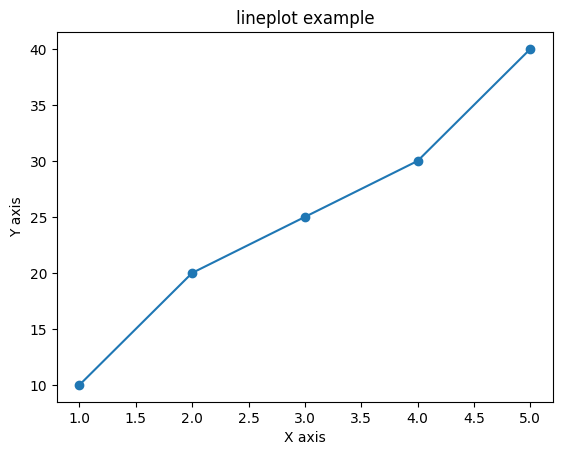

In [147]:
# matplotlib
# plotly      
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# 간단한 선 그래프
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]
plt.plot(x, y, marker='o')
plt.title("lineplot example")
plt.xlabel("X axis")
plt.ylabel("Y axis")

plt.show()

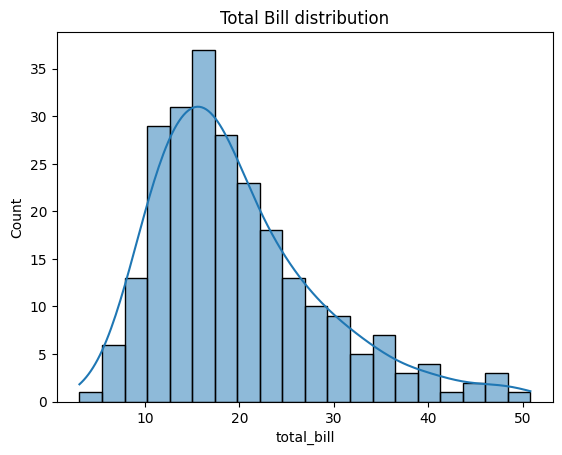

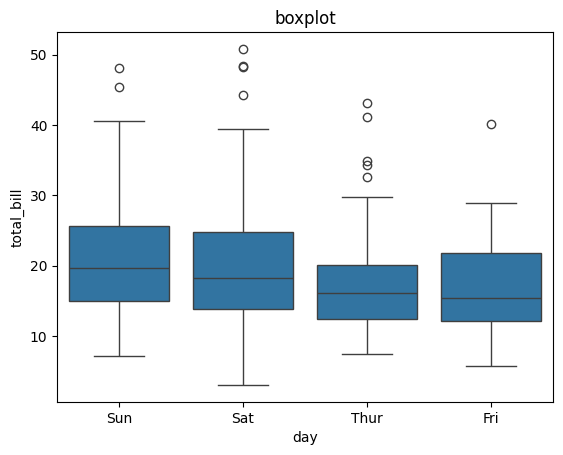

In [148]:
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")
# Seaborn 히스토그램
sns.histplot(df['total_bill'], bins=20, kde=True)
plt.title("Total Bill distribution")
plt.show()

# Seaborn 박스플롯 (이상치 탐색)
sns.boxplot(x=df['day'], y=df['total_bill'])
plt.title("boxplot")
plt.show()

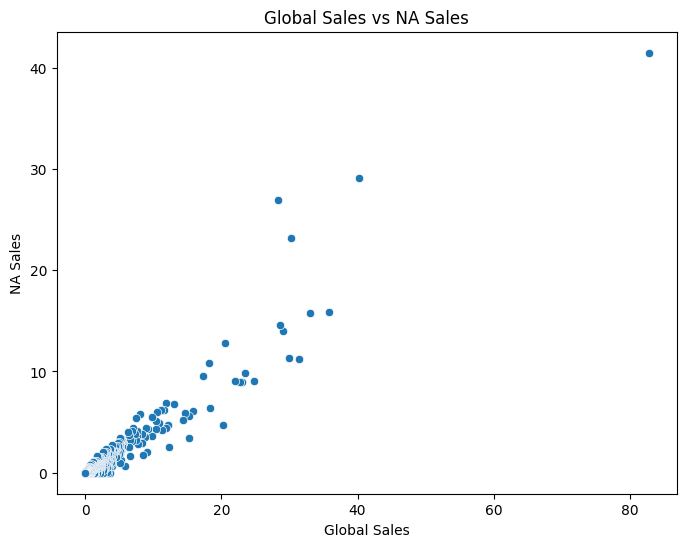

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Global Sales와 NA Sales 간의 관계를 산점도로 표현
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_sales['Global_Sales'], y=df_sales['NA_Sales'])
plt.title('Global Sales vs NA Sales')
plt.xlabel('Global Sales')
plt.ylabel('NA Sales')
plt.show()

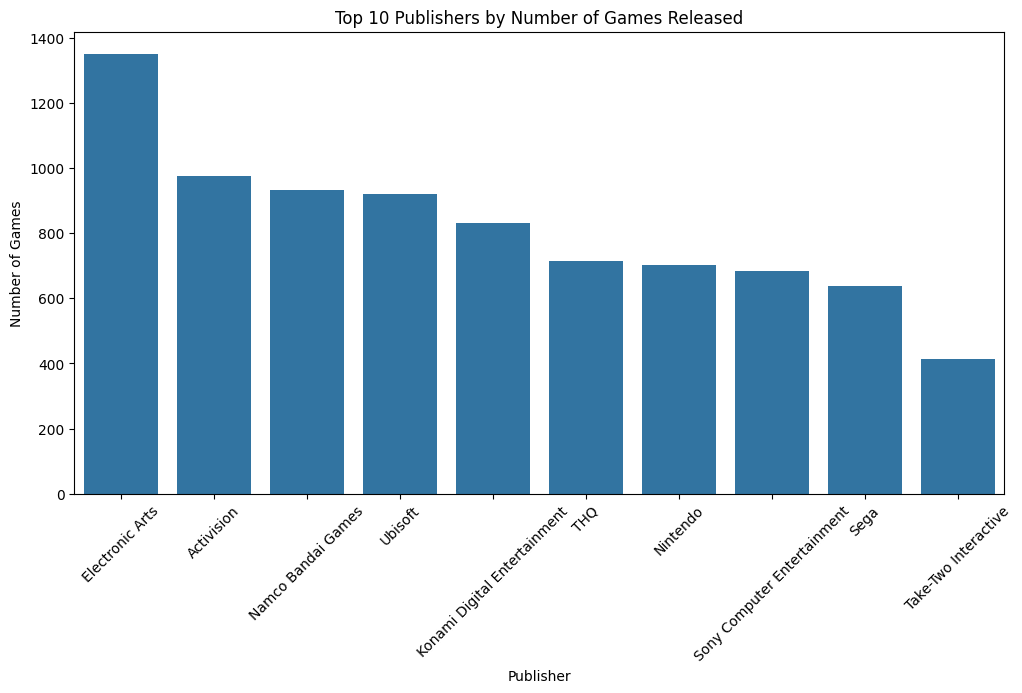

In [152]:
# Publisher 별 게임 개수 계산
publisher_counts = df_sales['Publisher'].value_counts().head(10)  # 상위 10개만 표시

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.title("Top 10 Publishers by Number of Games Released")
plt.xlabel("Publisher")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()